# Introduction to `matplotlib`

## Overview
- **Teaching:** 10 min
- **Exercises:** 10 min

**Questions**
* 
* 

**Objectives**
* 
* 
* 

Plotting of data is pandas is handled by an external Python module called *matplotlib*. Like pandas it is a large library and has a venerable history (first released in 2003) and so we couldn't hope to cover all its functionality in this course. To see the wide range of possibilities you have with matplotlib see its [example gallery](http://matplotlib.org/gallery.html).

Here we will cover the basic uses of it and how it integrates with pandas. While working through these examples you will likely find it very useful to refer to the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html).

## Plotting using NumPy and matplotlib

That's what we'll do

In [1]:
## Should probably explain this voodoo:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

While it's useful to be able to quickly plot any data we have in front of us, matplotlib's power comes from its configurability. Let's experiment with a dataset and see how much we can change the plot.

We'll start with a simple `DataFrame` contianing two columns, one with the values of a cosine, the other with the values of a sine.

Sinc:
$$\text{sinc}(x):=\frac{\sin(\pi x)}{\pi x}$$

In [2]:
x = np.linspace(-5, 5, 1000)
# sinc(x) is defined to be sin(pi*x)/(pi*x) in numpy
y_sinc = np.sinc(x)

Try to explain inline `matplotlib` oddities

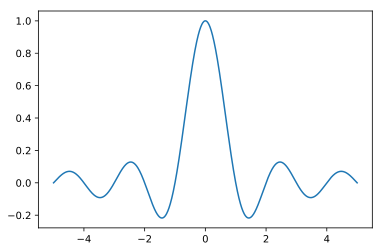

In [3]:
plt.plot(x, y_sinc)

You can see that it has plotted the sine and cosine curves between $\pi$ and $-\pi$. Now, let's go through and see how we can affect the display of this plot.

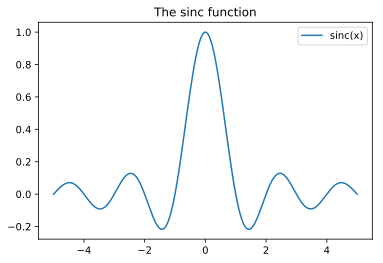

In [4]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend()
plt.show()

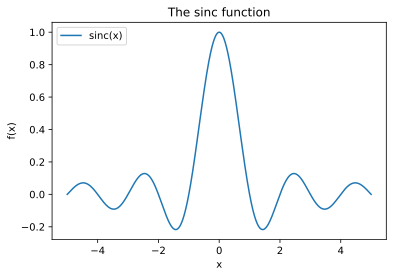

In [5]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

ADD EXERCISE HERE (Do some other function and plot it)

## Plotting using pandas and matplotlib

We'll do that, but I'll complain about it!

First we import pandas and numpy in the same way as we did previously.

In [6]:
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` method as we will see) but for much of it you need to import the matplotlib interface itself.

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. [By convention](http://matplotlib.org/faq/usage_faq.html#coding-styles) this is imported as `plt`.

We also set the figure format to be SVG so that the plots look a little nicer in our Jupyter notebook.

Once we have imported matplotlib we can start calling its functions. Any functions called on the `plt` object will affect all of matplotlib from that point on in the script.

We first need to import some data to plot. Let's start with the data from the pandas section (available from [cetml1659on.dat](https://raw.githubusercontent.com/milliams/data_analysis_python/master/cetml1659on.dat)) and import it into a `DataFrame`:

In [7]:
df = pd.read_csv(
    '../data/cetml1659on.dat',  # file name
    skiprows=6,  # skip header
    sep='\s+',  # whitespace separated
    na_values=['-99.9', '-99.99'],  # NaNs
)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter, for example by setting the axis labels using the `plt.ylabel()` function before displaying it with `plt.show()`.

Matplotlib operates on a single global state and calling any function on `plt` will alter that state. Calling `df.plot()` sets the *currently operating* plot. `plt.ylabel()` then alters that state and `plt.show()` displays it.

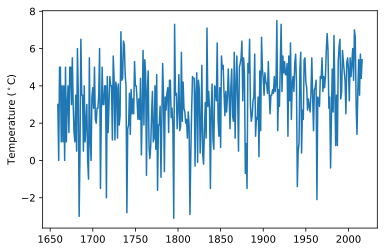

In [8]:
df['JAN'].plot()

plt.ylabel(r'Temperature ($^\circ$C)')

plt.show()

### Exercise 3

- Make sure you can reproduce the plot above. Try tweaking the labels or which column is plotted.
- Try putting in two `plot()` calls with different months (January and July for example) before calling `show()`.

### Exercise 4

- Using the temperature dataset, set the colours of the July and January lines to a warm colour and a cool colour.
- Add in the yearly average column to the plot with a dashed line style.

### Exercise 5

- Add in a legend for the data.
- Add an annotation to one of the spikes in the data. Make sure the label is placed nicely.
 - Tip: you can get the year and temperature for a spike using:
 ```python
  warm_winter_year = df['JAN'].idxmax()
  warm_winter_temp = df['JAN'].max()
 ```
- Save the figure to a file and display it in your Jupyter notebook.

## Bar charts

Of course, Matplotlib can plot more than just line graphs. One of the other most common plot types is a bar chart. Let's work towards plotting a bar chart of the average temperature per decade.

Let's start by adding a new column to the data frame which represents the decade. We create it by taking the index (which is a list of years), converting each element to a string and then replacing the fourth character with a `'0'`.

In [9]:
years = Series(df.index, index=df.index).apply(str)
decade = years.apply(lambda x: x[:3]+'0')

df['decade'] = decade
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


Once we have our decade column, we can use Pandas `groupby()` function to gather our data by decade and then aggregate it by taking the mean of each decade.

In [10]:
by_decade = df.groupby('decade')
agg = by_decade.aggregate(np.mean)

agg.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
decade,,,,,,,,,,,,,
1650,3.00,4.00,6.00,7.00,11.00,13.00,16.00,16.00,13.00,10.00,5.00,2.00,8.870
1660,2.60,4.00,5.10,7.70,10.60,14.50,16.00,15.70,13.30,10.00,6.30,3.80,9.157
1670,3.25,2.35,4.50,7.25,11.05,14.40,15.80,15.25,12.40,8.95,5.20,2.45,8.607
1680,2.50,2.80,4.80,7.40,11.45,14.00,15.45,14.90,12.70,9.55,5.45,4.05,8.785
1690,1.89,2.49,3.99,6.79,9.60,13.44,15.27,14.65,11.93,8.64,5.26,3.31,8.134


At this point, `agg` is a standard Pandas `DataFrame` so we can plot it like any other, by putting `.bar` after the `plot` call:

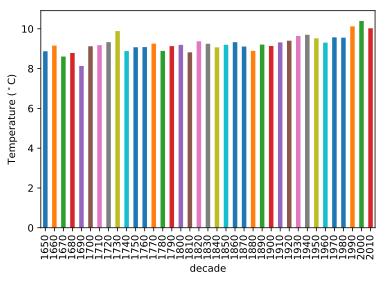

In [11]:
agg.YEAR.plot.bar()

plt.ylabel(r'Temperature ($^\circ$C)')

plt.show()

### Exercise 6

1. Plot a bar chart of the average temperature per *century*.
 - Set the limits of the y-axis to zoom in on the data.

2. Plot a *histogram* of the average annual temperature
 - Make sure that the x-axis is labelled correctly.
 - Tip: Look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the right command to run
 
3. Plot a scatter plot of each year's February temperature plotted against that year's January temperature. Is there an obvious correlation?

## Key Points
* 
* 
* 
* 